<a href="https://colab.research.google.com/github/akinzayn/BCIS-561/blob/main/Iroko_TV_Customer_Acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman") #installing the pacman package that helps us install other packages
library(pacman) #loading pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p_load(tidyverse, googledrive,readxl,writexl, rstatix) #install and load the packages. Tidyverse(is used for data wrangling) and googledrive(because the files are saved on google drive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


writexl installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘corrplot’, ‘car’



rstatix installed



In [ ]:
drive_deauth() #remove authorization permission from the google drive 
file_details = drive_get(as_id(c("1R10HMbT3MhpUZM0sFEKuHHoaCAkpoO7tUWN8hAD75rc","1nMlw4W2DbDQJEnuVZXqtmIm0krueU0gp6Qvwde2NbG4"))) #get the link associated to the file on google doc
for(i in 1:2){
drive_download(file_details[i,], overwrite = TRUE) #download the details of the file from google drive, the space after the i indicates that we don't care about the column position
}


File downloaded:

• subscriptions <id: 1R10HMbT3MhpUZM0sFEKuHHoaCAkpoO7tUWN8hAD75rc>

Saved locally as:

• subscriptions.xlsx

File downloaded:

• visits <id: 1nMlw4W2DbDQJEnuVZXqtmIm0krueU0gp6Qvwde2NbG4>

Saved locally as:

• visits.xlsx



In [ ]:
rm(list = ls())

In [ ]:
# setting figure size

fig <- function(width = 6, heigth = 6){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(width = 12, heigth = 6.75)

In [ ]:
subscriptions_df = read_excel("subscriptions.xlsx") #read_excel is used to read the subscription.xlsx data . 
visits_df = read_excel("visits.xlsx") # read the visit.xlsx 

In [ ]:
#head(subscriptions_df, 1) #check what the data looks like. The 1 is to show the first row only
#head(visits_df, 1)
dim(subscriptions_df)
dim(visits_df)
dim(data_df)

[1] 13612     7

[1] 47704     7

[1] 13612    13

In [ ]:
head(visits_df,1)

visit_id,account_id,day,region,language,channel,landing_page
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
4b987205-5da4-403c-b7d4-b952db264794,914fddea-7a72-4712-82dd-5b4590f9b670,2019-01-01,US/Canada,English,video,A


In [ ]:
data_df =  subscriptions_df %>% left_join( visits_df) #join the two dataframes. Acount_ID is common to both. 
data_df %>% head(6) #the last two rows in the data frame
dim(data_df)# dimension of the data frame

Joining, by = "account_id"



subscription_id,account_id,subscription_start_date,subscription_end_date,trial_start_date,trial_end_date,revenue,visit_id,day,region,language,channel,landing_page
<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
96d87f27-c4e3-401e-9efd-795834b12e1b,914fddea-7a72-4712-82dd-5b4590f9b670,2019-01-08,2020-01-08,2019-01-01,2019-01-08,1016.28,4b987205-5da4-403c-b7d4-b952db264794,2019-01-01,US/Canada,English,video,A
91838d2f-5cc1-448c-95d2-05dce13f0090,7e6ccf6b-16e1-4ea1-9057-ead81ac1cedd,2019-01-01,2020-01-01,NA,NA,755.67,93d005cd-2990-4432-ae98-bd11c9c28f63,2019-01-01,US/Canada,English,organic search,G
7cb08fd7-9440-4a17-9cbd-674954d9b1c5,f7b65b83-2e33-4926-b36a-f37fead86623,2019-01-01,2020-01-01,NA,NA,999.89,d2bd6d7a-0f61-4323-8bbc-1e934a7368fd,2019-01-01,US/Canada,English,organic search,H
ab2b038d-e56c-4102-8662-dedbff889235,f9b33d91-66d1-485c-8c6e-d27bdb46d605,2019-01-08,2020-01-08,2019-01-01,2019-01-08,971.82,83674a56-2bc3-47ed-95ee-598ee782d333,2019-01-01,US/Canada,English,paid search,E
183c7790-06fb-40f8-acf4-f3c78db265fd,c5124861-4163-409d-a419-c87681537371,2019-01-02,2020-01-02,NA,NA,1280.93,a6cb6fcf-50e9-4513-bad9-131172cfe9ca,2019-01-02,US/Canada,English,display,G
0adab5fa-ec35-4e1e-9da5-70bd45d684f6,c0463e2b-ca34-4f2c-b50f-a418df8923de,NA,NA,2019-01-02,2019-01-09,NA,93d4347a-a0cf-4b2e-a32c-d384669da376,2019-01-02,US/Canada,English,paid search,A


[1] 13612    13

In [ ]:
length(unique(data_df$day))

[1] 731

**Q 1: How much revenue did each region generate within the time frame covered by
the data sets?**

In [ ]:
group_rev = data_df %>% group_by(region) %>% #pass the arguement region to the function group_by in the dataframe, then assign it to group_rev
            summarise(revenue = sum(revenue,na.rm = TRUE)) #add the sum of rev and remove missing values
group_rev %>% arrange(desc(revenue))

region,revenue
<chr>,<dbl>
Latin America,2373439
Asia,1974550
US/Canada,1583260
"Europe, Middle East, & Africa (Non-English)",1317910
Other English-Speaking Countries,1135564


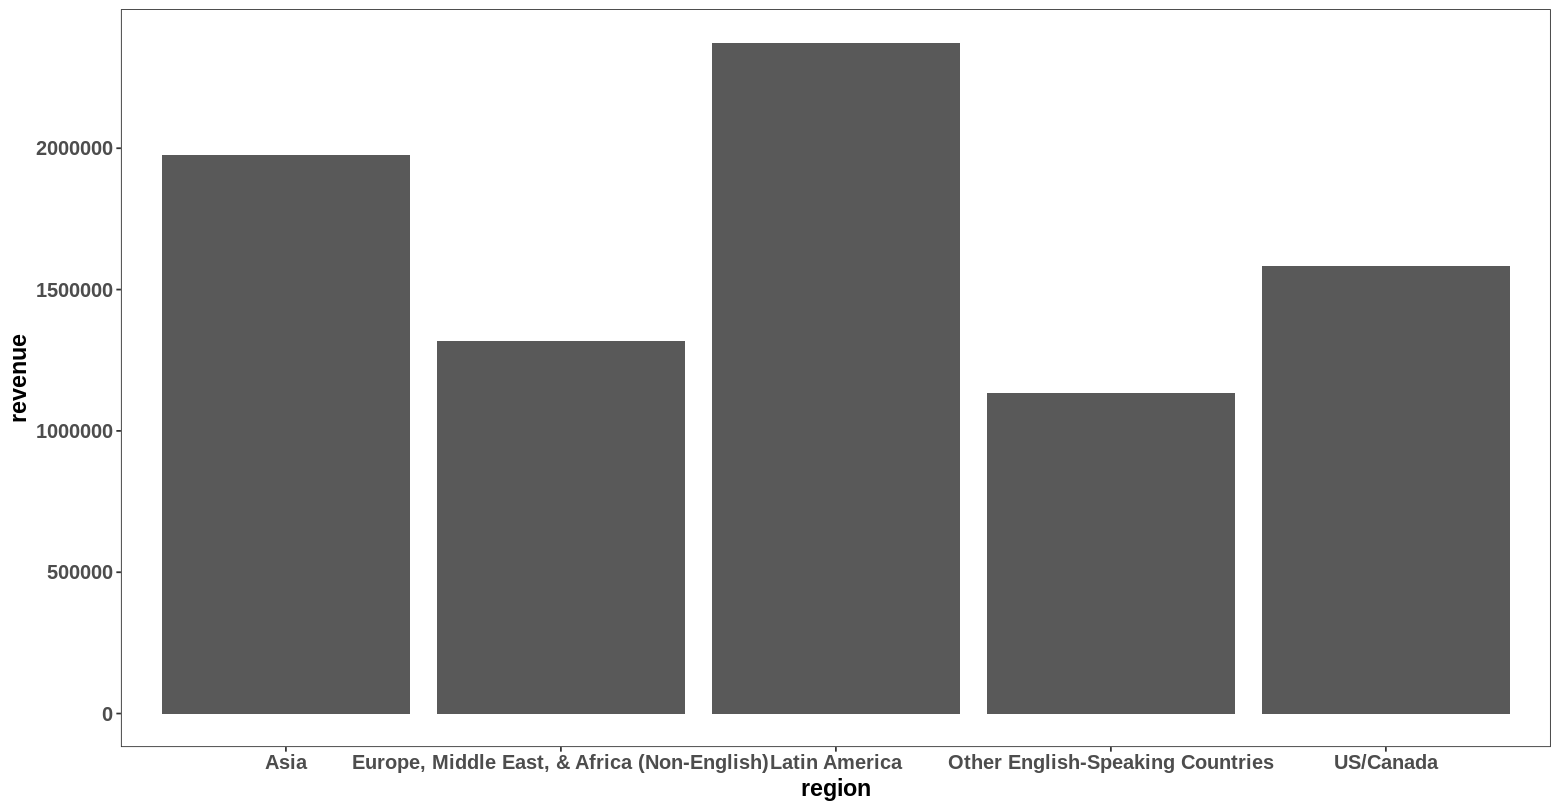

In [ ]:
fig(width = 13, heigth = 6.75)
group_rev %>% ggplot(aes(y = revenue, x = region)) +
              geom_col() +
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

### **2. Which channel had the highest revenue per visit? What was its revenue per visit?**

In [ ]:
data_df %>% drop_na("revenue") %>%
           arrange(desc(revenue)) %>%
           head(1) %>%
           select(c("channel", "revenue"))

channel,revenue
<chr>,<dbl>
display,2427.29


## The display channel had the highest revenue per visit and it generated $2427.29 per visit.

### **3. Which landing page had the highest overall conversion rate (% of visitors that go on to become paying subscribers)? What was its conversion rate?**

In [ ]:
landing_page_conversion_rate =  data_df %>% 
            mutate(subscription_status = ifelse(is.na(subscription_start_date), 0,1)) %>%
            group_by(landing_page) %>%
            summarise( count = n(), conversion_rate = (sum(subscription_status)/ count) * 100, conversion_rate =  round(conversion_rate,2), .groups = 'drop') %>% 
            arrange(desc(conversion_rate))
landing_page_conversion_rate

landing_page,count,conversion_rate
<chr>,<int>,<dbl>
H,773,65.72
A,1469,62.63
I,1253,62.25
G,950,61.89
E,3006,61.11
C,1096,58.67
J,1232,58.36
F,464,57.76
D,1751,57.51


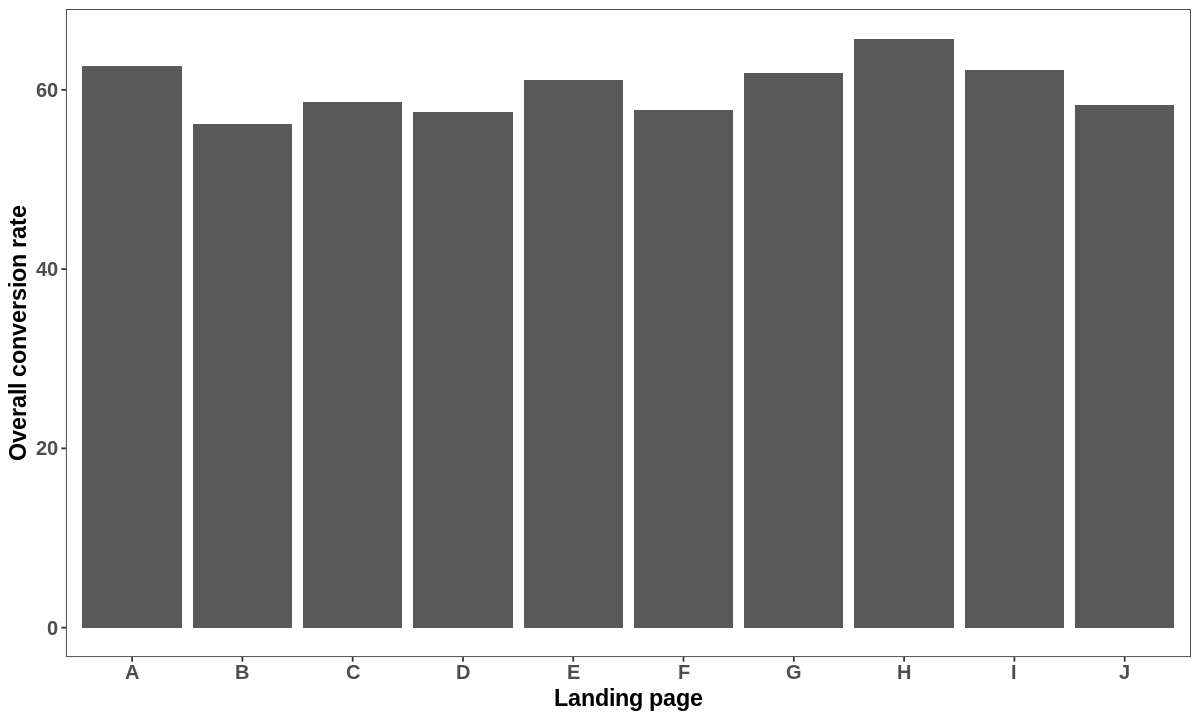

In [ ]:
fig(width = 10, heigth = 6)
landing_page_conversion_rate %>% ggplot(aes(y = conversion_rate, x = landing_page)) +
              geom_col() +
            theme_minimal(base_size = 18)+
            labs(x = "Landing page", y = "Overall conversion rate") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

## The "D" landing page had the highest overall conversion rate.

### **4. Did any regions have a different top converting landing page (as compared to the previous answer)? If so, please list them along with their top landing page and its conversion rate.**

In [ ]:
landing_page_conversion_rate =  data_df %>% 
            #mutate(subscription_status = ifelse(is.na(subscription_start_date), 0,1)) %>%
            group_by(region,landing_page) %>%
            summarise( count = n(), conversion_rate = (sum(!is.na(subscription_start_date))/ count) * 100, conversion_rate =  round(conversion_rate,2)) %>% arrange(desc(conversion_rate), .by_group = TRUE)
landing_page_conversion_rate  %>% top_n(1)

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.

Selecting by conversion_rate



region,landing_page,count,conversion_rate
<chr>,<chr>,<int>,<dbl>
Asia,H,118,69.49
"Europe, Middle East, & Africa (Non-English)",J,247,64.78
Latin America,E,628,69.27
Other English-Speaking Countries,I,116,65.52
US/Canada,H,167,68.86


## From the table above, the landing page (H) for US/Canada region has a different top landing page  and the conversion rate is 19.20%

In [ ]:
landing_page_conversion_rate  %>% top_n(2)

Selecting by conversion_rate



region,landing_page,count,conversion_rate
<chr>,<chr>,<int>,<dbl>
Asia,H,118,69.49
Asia,F,101,64.36
"Europe, Middle East, & Africa (Non-English)",J,247,64.78
"Europe, Middle East, & Africa (Non-English)",A,339,63.42
Latin America,E,628,69.27
Latin America,I,298,68.46
Other English-Speaking Countries,I,116,65.52
Other English-Speaking Countries,H,133,63.91
US/Canada,H,167,68.86


### **5. Which region had the highest direct subscription rate (% of visitors that start a subscription directly without doing a trial)? What was its direct subscription rate?**

In [ ]:
direct_subscription_rate_per_region =  data_df %>% 
             mutate(subscription_without_trial = (!is.na(subscription_start_date)) * is.na(trial_start_date)) %>%
             group_by(region) %>%
             summarise( count = n(), direct_subscription_rate = (sum(subscription_without_trial)/ count) * 100, direct_subscription_rate =  round(direct_subscription_rate,2), .groups = 'drop') %>%
             arrange(desc(direct_subscription_rate))
direct_subscription_rate_per_region

region,count,direct_subscription_rate
<chr>,<int>,<dbl>
Asia,2836,36.74
Latin America,3318,33.79
US/Canada,3036,28.99
"Europe, Middle East, & Africa (Non-English)",2369,26.55
Other English-Speaking Countries,2053,25.13


## The Asian region had the highest direct subscription rate of 10.03%

### **6. Which region had the highest trial start rate (% of visitors that start a trial, regardless of whether those users ultimately cancel or become paying subscribers)? What was its trial start rate?**

In [ ]:
trial_start_rate_per_region =  data_df %>% 
            group_by(region) %>%
            summarise( count = n(), trial_start_rate = (sum(!is.na(trial_start_date))/ count) * 100, trial_start_rate =  round(trial_start_rate,2), .groups = 'drop') %>%
            arrange(desc(trial_start_rate))
trial_start_rate_per_region

region,count,trial_start_rate
<chr>,<int>,<dbl>
Other English-Speaking Countries,2053,74.87
"Europe, Middle East, & Africa (Non-English)",2369,73.45
US/Canada,3036,71.01
Latin America,3318,66.21
Asia,2836,63.26


## The Other English-Speaking Countries region had the highest trial start rate of 23.15%

### **7. Which region had the highest trial conversion rate (% of trials that start a subscription)? What was its trial conversion rate?**

In [ ]:
trial_conversion_rate_per_region =  data_df %>% 
            mutate(trial_then_subscription = (!is.na(subscription_start_date)) * (!is.na(trial_start_date))) %>%
             group_by(region) %>%
             summarise( count = n(), trial_conversion_rate = (sum(trial_then_subscription)/ count) * 100, trial_conversion_rate =  round(trial_conversion_rate,2), .groups = 'drop') %>%
            arrange(desc(trial_conversion_rate))
trial_conversion_rate_per_region

region,count,trial_conversion_rate
<chr>,<int>,<dbl>
"Europe, Middle East, & Africa (Non-English)",2369,32.80
Other English-Speaking Countries,2053,32.49
Latin America,3318,30.68
US/Canada,3036,26.78
Asia,2836,25.28


## The Other English-Speaking Countries had highest trial conversion rate of 10.05%

### **8. Suppose that the company has a goal to increase revenue from the US/Canada region by 20% over the next year. Provide at least 4 potential strategies we could employ to help us reach our goal (no supporting data analysis required—just ideas)**

Based on my exploratory data and multivariate testing and power analysis, here are my recommendations on how Iroko TV can improve revenue by 20% in the US/Canda region.

1. Although it appears landing pages D and H have the same conversion rates for the US/Canada region, the conversion rate from H is significantly better in a statistical sense. So it make sense to focus on using landing page H for visitors in this region.

2. The data also suggest that visitors are more likely to end up subscribing (direct or post-trial) if they visit on Thurdays and Fridays. So perhaps, aggressively finding a way fro user to visit on these two day would yield more revenue.

3. Likewise, days around the beginning of the month (1 & 3) middle of the month (15 &16)  and end of the month (20, 24, & 25) are days which the data suggest there is high conversion rate. Necessarily, focusing on these set of days would increase revenue.

4. Since video appears to have the highest conversion rate, it makes sense to allocate more resources towards getting more visitors through the video channel. Based on the average revenue from the video channel which sits at roughly \$790 compared to that of the organic search channel which is $930, there is an opportunity to increase revenue if more visitors are acquired via the video channel. 


In [ ]:
data_df_to_save = data_df %>% 
                  mutate(trial_then_subscription = (!is.na(subscription_start_date)) & (!is.na(trial_start_date)) ,
                  subscription_without_trial = (!is.na(subscription_start_date)) & is.na(trial_start_date) ,
                  subscription_status = ifelse(is.na(subscription_start_date), FALSE, TRUE),
                  subscription_start_day_of_week = weekdays(subscription_start_date), 
                  subscription_end_day_of_week = weekdays(subscription_start_date),
                  trial_start_day_of_week = weekdays(trial_start_date), 
                  trial_end_day_of_week = weekdays(trial_start_date),
                  subcription_length = subscription_end_date -	subscription_start_date, 
                  trial_length = trial_end_date - trial_start_date)
new_data = data_df_to_save        

In [ ]:
 write_xlsx(data_df_to_save, "iroko_df.xlsx")   

## **Additional Data Analysis**

In [ ]:
head(new_data[sample.int(dim(new_data)[1], 3),])

subscription_id,account_id,subscription_start_date,subscription_end_date,trial_start_date,trial_end_date,revenue,visit_id,day,region,⋯,landing_page,trial_then_subscription,subscription_without_trial,subscription_status,subscription_start_day_of_week,subscription_end_day_of_week,trial_start_day_of_week,trial_end_day_of_week,subcription_length,trial_length
<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dttm>,<chr>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<drtn>,<drtn>
8f2eed47-d4d7-4e4b-b143-1e95dc22654e,5e58e4d8-1a50-4cd7-89ee-fbd40ead5a57,2020-05-05,2021-05-05,2020-04-28,2020-05-05,1239.41,baee6338-4e58-41b1-ba1a-c5738652723e,2020-04-28,Asia,⋯,D,TRUE,FALSE,TRUE,Tuesday,Tuesday,Tuesday,Tuesday,365 days,7 days
3cf0bdca-39f4-448d-97e7-02ab47ee764b,82e23f9a-35f6-4cd6-9821-3b0595b2ea27,NA,NA,2019-10-09,2019-10-16,NA,a30b71fa-b75e-409d-944f-828df5ed5e67,2019-10-09,Asia,⋯,E,FALSE,FALSE,FALSE,NA,NA,Wednesday,Wednesday,NA days,7 days
cbc65864-999e-430c-91fa-68ca3c559fcc,49b08c49-8519-461c-996c-c4b4a025e6f3,2020-05-05,2021-05-05,2020-04-28,2020-05-05,1418.78,b6678edf-aac7-4dbd-8c23-4d8fd700fb04,2020-04-28,Asia,⋯,B,TRUE,FALSE,TRUE,Tuesday,Tuesday,Tuesday,Tuesday,365 days,7 days


In [ ]:
US_Canada_data = new_data %>% filter(region == "US/Canada")
dim(US_Canada_data)

[1] 3036   22

In [ ]:
p_load(lubridate, powerMediation)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


powerMediation installed



In [ ]:
total_sample_size <- SSizeLogisticBin(p1 = 0.19,
                                      p2 = 0.39,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

[1] 160

In [ ]:
US_Canada_Anova =  aov(revenue ~ landing_page, US_Canada_data)
anova_summary( US_Canada_Anova )

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,landing_page,9,1683,56.723,1.41e-90,*,0.233


In [ ]:
US_Canada_Anova %>% tukey_hsd()

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,landing_page,A,B,0,-366.211985,-439.901326,-292.522644,1.54e-12,****
2,landing_page,A,C,0,-406.148184,-482.655201,-329.641167,1.54e-12,****
3,landing_page,A,D,0,-84.100754,-155.851801,-12.349706,8.03e-03,**
4,landing_page,A,E,0,-235.739701,-296.582382,-174.897021,1.54e-12,****
5,landing_page,A,F,0,-328.880168,-437.713296,-220.047039,1.63e-12,****
6,landing_page,A,G,0,-216.709011,-291.390157,-142.027865,1.65e-12,****
7,landing_page,A,H,0,-265.635168,-345.829246,-185.441091,1.63e-12,****
8,landing_page,A,I,0,-173.942473,-245.404153,-102.480794,2.56e-12,****
9,landing_page,A,J,0,-325.176390,-399.601004,-250.751776,1.54e-12,****


In [ ]:
table(US_Canada_data$subscription_status)


FALSE  TRUE 
 1343  1693 

In [ ]:
 US_Canada_data  %>% select(day, subscription_status) %>%
  group_by(wday(day)) %>%
  summarize(conversion_rate = mean(subscription_status))

wday(day),conversion_rate
<dbl>,<dbl>
1,0.4666667
2,0.5056604
3,0.5869565
4,0.6043738
5,0.5798479
6,0.5543478
7,0.5534591


In [ ]:
 US_Canada_data  %>% select(day, subscription_status) %>%
  group_by(mday(day)) %>%
  summarize(conversion_rate = mean(subscription_status)) %>% arrange(desc(conversion_rate)) %>% top_n(10)

Selecting by conversion_rate



mday(day),conversion_rate
<int>,<dbl>
24,0.6666667
3,0.6236559
5,0.6176471
15,0.6000000
20,0.5943396
18,0.5930233
8,0.5909091
22,0.5904762
7,0.5876289


In [ ]:
 US_Canada_data  %>% select(channel, subscription_status) %>%
  group_by(channel) %>%
  summarize(conversion_rate = mean(subscription_status)) %>% arrange(desc(conversion_rate)) %>% top_n(10)

Selecting by conversion_rate



channel,conversion_rate
<chr>,<dbl>
social,1.0000000
partner referral,0.6523929
display,0.6324786
video,0.6194030
paid search,0.5368803
organic search,0.5253648
email,0.3333333


In [ ]:
 US_Canada_revenue_by_channels = US_Canada_data  %>% select(channel, revenue) %>%
  group_by(channel) %>%
  summarize(sum_revenue = sum(revenue, na.rm = TRUE), avg_revenue = mean(revenue, na.rm = TRUE) ) %>% arrange(desc(sum_revenue))

US_Canada_revenue_by_channels
US_Canada_revenue_by_channels %>% arrange(desc(avg_revenue))

channel,sum_revenue,avg_revenue
<chr>,<dbl>,<dbl>
organic search,702307.89,928.9787
paid search,369824.62,832.9383
partner referral,258680.73,998.7673
display,184596.93,1247.2766
video,65532.96,789.5537
social,1738.94,869.4700
email,578.22,578.2200


channel,sum_revenue,avg_revenue
<chr>,<dbl>,<dbl>
display,184596.93,1247.2766
partner referral,258680.73,998.7673
organic search,702307.89,928.9787
social,1738.94,869.4700
paid search,369824.62,832.9383
video,65532.96,789.5537
email,578.22,578.2200


In [ ]:
table(US_Canada_data$channel)


         display            email   organic search      paid search 
             234                3             1439              827 
partner referral           social            video 
             397                2              134 

In [ ]:
US_Canada_Anova =  aov(revenue ~ channel, US_Canada_data)
anova_summary( US_Canada_Anova )
US_Canada_Anova %>% tukey_hsd() %>% arrange(group2)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,channel,6,1686,85.955,3.85e-94,*,0.234


term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
channel,display,email,0,-669.05655,-1281.20343,-56.90968,2.17e-02,*
channel,display,organic search,0,-318.29786,-373.13640,-263.45933,2.91e-12,****
channel,email,organic search,0,350.75869,-259.73391,961.25129,6.19e-01,ns
channel,display,paid search,0,-414.33822,-472.24533,-356.43111,2.91e-12,****
channel,email,paid search,0,254.71833,-356.05755,865.49422,8.82e-01,ns
channel,organic search,paid search,0,-96.04036,-132.51841,-59.56231,3.26e-12,****
channel,display,partner referral,0,-248.50926,-311.37439,-185.64413,2.91e-12,****
channel,email,partner referral,0,420.54730,-190.71858,1031.81318,3.95e-01,ns
channel,organic search,partner referral,0,69.78861,25.86322,113.71399,6.05e-05,****
